In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
test = pd.read_csv(r"E:\Dokumenty\gk\Python\Kaggle\titanic\test.csv")
train = pd.read_csv(r"E:\Dokumenty\gk\Python\Kaggle\titanic\train.csv")
test_ids = test["PassengerId"]
test = test.drop(['Ticket', 'Name', "PassengerId"], axis=1)
train = train.drop(['Ticket', 'Name', "PassengerId"], axis=1)

In [3]:
# Checking missing values
pd.isnull(test).sum()


Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [4]:
pd.isnull(train).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

C:\Users\gkacz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

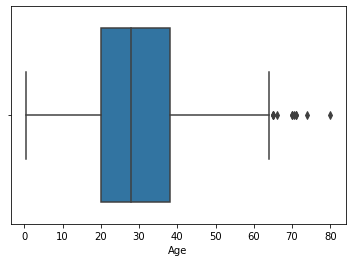

In [5]:
sns.boxplot(train.Age)

C:\Users\gkacz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

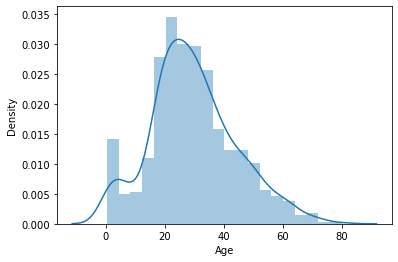

In [6]:
sns.distplot(train.Age)

C:\Users\gkacz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

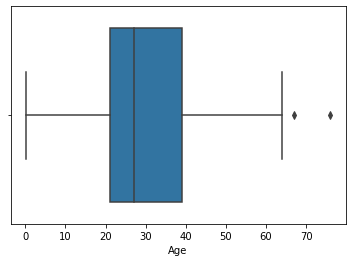

In [7]:
sns.boxplot(test.Age)

C:\Users\gkacz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

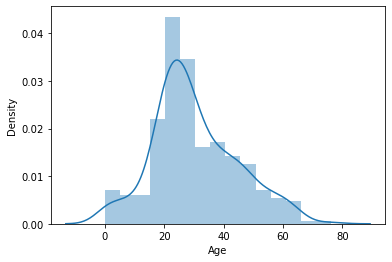

In [8]:
sns.distplot(test.Age)

In [9]:
test.shape

(418, 8)

In [10]:
train.shape

(891, 9)

In [11]:
# Dropping Cabin column because it has over 60% of missing data.
test = test.drop("Cabin", axis = 1)
train = train.drop("Cabin", axis = 1)

In [12]:
#Replacing missing values with median (because data is skewed)
test["Age"] = test["Age"].fillna(test.Age.median())
train["Age"] = train["Age"].fillna(train.Age.median())

In [13]:
#Replacing missing values in Embarked with mode
train["Embarked"] = train["Embarked"].fillna(train.Embarked.mode()[0])
test["Fare"] = test["Fare"].fillna(test.Fare.mean())

In [14]:
pd.isnull(train).sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
pd.isnull(test).sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# Recoding strings to ints
def recode(gender):
    if gender == 'female':
        return 1
    else:
        return 0
train['Sex'] = train['Sex'].apply(recode)
test['Sex'] = test['Sex'].apply(recode)

In [18]:
def recode_emb(embarked):
    if embarked == 'S':
        return 0
    if embarked == 'C':
        return 1
    else:
        return 2
train['Embarked'] = train['Embarked'].apply(recode_emb)
test['Embarked'] = test['Embarked'].apply(recode_emb)

In [19]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train["Survived"]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
y = train["Survived"]
X = train.drop("Survived", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [23]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.7988826815642458

In [24]:
submission_preds = clf.predict(test)

In [25]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived": submission_preds})

In [26]:
#df.to_csv("submission3.csv", index=False)

In [28]:
train.corr(method='pearson')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000
